In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
data_df = pd.read_csv("mydata_DA.csv")
data_df

,State,County,Street,City,Zipcode,Price,WalkScore,Bike_Score,Beds,Bath,Sqft,Property_Type,Year_Built,Status
0,Ca,Marin-County,6 issaquah dock,Sausalito,94965,1495000.0,67,83.0,2.0,2.0,1228.0,Mobile/manufactured home,1987.0,Active
1,Ca,Marin-County,712 tamarack dr s,San rafael,94903,1699000.0,38,27.0,5.0,3.0,2306.0,Single family residential,1963.0,Active
2,Ca,Marin-County,41 bonnie banks way,San rafael,94901,1995000.0,29,29.0,4.0,3.0,3500.0,Single family residential,1970.0,Active
3,Ca,Marin-County,510 midway blvd,Novato,94947,885000.0,21,16.0,3.0,2.0,1212.0,Single family residential,1955.0,Active
4,Ca,Marin-County,848 diablo ave #3,Novato,94947,618000.0,88,69.0,2.0,2.5,1270.0,Condo,2000.0,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,Ca,Santa-Clara-County,926 northrup st,San jose,95126,1249000.0,82,75.0,2.0,2.0,1934.0,Duplex,1957.0,Active
594,Ca,Santa-Clara-County,4895 pearl ave,San jose,95136,1880000.0,74,74.0,2.0,1.0,1322.0,Single family home,1917.0,Active
595,Ca,Santa-Clara-County,15600 peach hill rd,Saratoga,95070,3749000.0,0,0.0,3.0,2.0,2607.0,Single family home,1960.0,Active
596,Ca,Santa-Clara-County,110 cochrane rd,Morgan hill,95037,920000.0,45,73.0,3.0,3.0,1773.0,Townhouse,2014.0,Active


In [3]:
#removing properties with price less than $30k to remove properties that could be possible scams.
data_df.drop(data_df.index[data_df['Price']<30000],inplace=True)

In [4]:
data_df.describe()
# Performed Exploratory Data Analysis to get a bird's eye view of data. It Showcases show the data is distributed 
# Gives a checkpoint to start other Analysis.

,Zipcode,Price,WalkScore,Bike_Score,Beds,Bath,Sqft,Year_Built
count,598.000000,5.980000e+02,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,94829.292642,1.454669e+06,42.734114,50.132107,3.172241,2.339465,1836.852843,1975.914716
std,315.175168,8.930653e+05,26.351087,26.321507,0.851896,0.716623,697.159137,26.654645
min,94022.000000,9.995000e+04,0.000000,0.000000,2.000000,1.000000,679.000000,1880.000000
25%,94559.000000,7.992498e+05,21.000000,28.000000,3.000000,2.000000,1320.500000,1958.000000
50%,94945.000000,1.249500e+06,42.000000,56.000000,3.000000,2.000000,1700.000000,1976.000000
75%,95070.000000,1.903722e+06,65.000000,71.000000,4.000000,2.875000,2184.250000,1994.750000
max,95687.000000,4.600000e+06,92.000000,100.000000,5.000000,4.500000,4210.000000,2023.000000


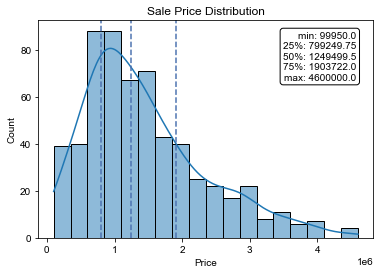

In [5]:
# Plotted the prices of all the counties to see how well the data is distributed. 
# We can conclude that price is positively skewed and mean > mode 
# which tells that there are outliers on the higher range of price of house listing
x = 'Price'
fig, ax = plt.subplots()
ax.title.set_text('Sale Price Distribution')
feature = data_df[x].fillna(data_df[x].mean())
sns.histplot(feature, kde=True)
des = data_df[x].describe()
ax.axvline(des["25%"], ls='--')
ax.axvline(des["50%"], ls='--')
ax.axvline(des["75%"], ls='--')
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "50%: "+des["50%"], "75%: "+des["75%"], "max: "+des["max"]))
ax.text(0.95, 0.95, box, transform=ax.transAxes, fontsize=10, va='top', 
        ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.show()

<AxesSubplot:>

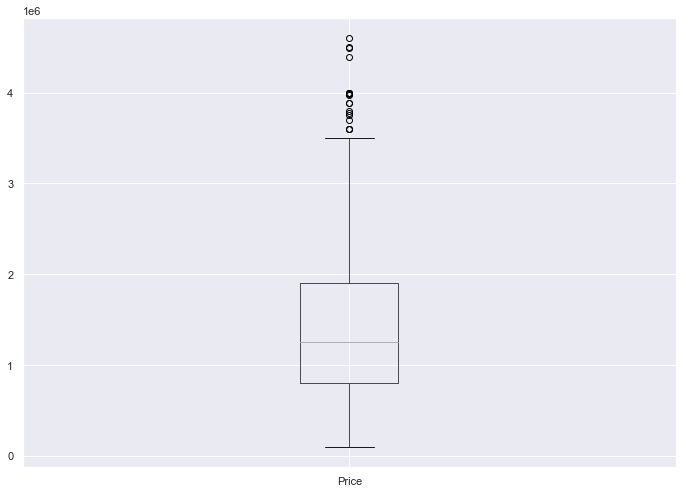

In [6]:
#Boxplot showing that there are more number of outliers on the higher range of price
data_df.boxplot(column=['Price'])

In [7]:
#Creating a column for Price per sqft
data_df['Price_per_sqft'] = (data_df['Price']/data_df['Sqft']).round(2)
data_df

,State,County,Street,City,Zipcode,Price,WalkScore,Bike_Score,Beds,Bath,Sqft,Property_Type,Year_Built,Status,Price_per_sqft
0,Ca,Marin-County,6 issaquah dock,Sausalito,94965,1495000.0,67,83.0,2.0,2.0,1228.0,Mobile/manufactured home,1987.0,Active,1217.43
1,Ca,Marin-County,712 tamarack dr s,San rafael,94903,1699000.0,38,27.0,5.0,3.0,2306.0,Single family residential,1963.0,Active,736.77
2,Ca,Marin-County,41 bonnie banks way,San rafael,94901,1995000.0,29,29.0,4.0,3.0,3500.0,Single family residential,1970.0,Active,570.00
3,Ca,Marin-County,510 midway blvd,Novato,94947,885000.0,21,16.0,3.0,2.0,1212.0,Single family residential,1955.0,Active,730.20
4,Ca,Marin-County,848 diablo ave #3,Novato,94947,618000.0,88,69.0,2.0,2.5,1270.0,Condo,2000.0,Active,486.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,Ca,Santa-Clara-County,926 northrup st,San jose,95126,1249000.0,82,75.0,2.0,2.0,1934.0,Duplex,1957.0,Active,645.81
594,Ca,Santa-Clara-County,4895 pearl ave,San jose,95136,1880000.0,74,74.0,2.0,1.0,1322.0,Single family home,1917.0,Active,1422.09
595,Ca,Santa-Clara-County,15600 peach hill rd,Saratoga,95070,3749000.0,0,0.0,3.0,2.0,2607.0,Single family home,1960.0,Active,1438.05
596,Ca,Santa-Clara-County,110 cochrane rd,Morgan hill,95037,920000.0,45,73.0,3.0,3.0,1773.0,Townhouse,2014.0,Active,518.89


In [8]:
#Average price_per_sqft for all the cities

city_df = data_df.groupby(by="City")
city_price_df = pd.DataFrame(city_df['Price_per_sqft'].mean().round(2))
city_price_df

,Price_per_sqft
City,
American canyon,278.09
Angwin,612.83
Benicia,465.82
Calistoga,786.37
Campbell,988.42
Clearlake,120.71
Cobb,190.45
Corte madera,953.64
Cupertino,1165.23


In [9]:
# Top 10 and Bottom 10 cities as per the Average price per square feet

Top10 = pd.DataFrame(city_price_df.sort_values(by = 'Price_per_sqft',ascending=False).head(10))
print(Top10)
Top10['Stack'] = 'Top10'

Bottom10 = pd.DataFrame(city_price_df.sort_values(by = 'Price_per_sqft',ascending=False).tail(10))
print(Bottom10)
Bottom10['Stack'] = 'Bottom10'

                 Price_per_sqft
City                           
Palo alto               1728.21
Monte sereno            1643.84
Saratoga                1558.74
Los altos               1448.83
Los altos hills         1349.73
Inverness               1275.26
Tiburon                 1218.49
Cupertino               1165.23
Los gatos               1083.13
Sausalito               1002.84
                 Price_per_sqft
City                           
Benicia                  465.82
Rohnert park             408.74
Vallejo                  358.88
Fairfield                316.14
Vacaville                311.87
American canyon          278.09
Kelseyville              202.75
Cobb                     190.45
Pope valley              172.54
Clearlake                120.71


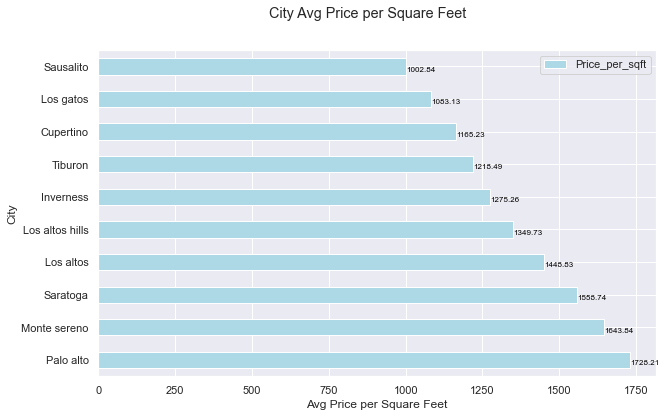

In [10]:
#Top 10 cities according to Average price per square feet


# Horizontal Bar Plot
ax = Top10.plot(kind='barh',color='lightblue',figsize=(10,6))
plt.xlabel("Avg Price per Square Feet")
plt.ylabel("City") 

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.4, i.get_y()+0.1,
             str(round((i.get_width()), 2)),
             fontsize = 8, color ='black')
    
plt.suptitle('City Avg Price per Square Feet')
# Show Plot
plt.show()

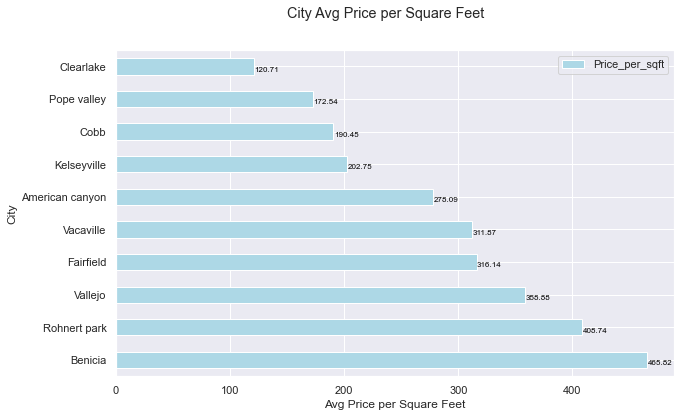

In [11]:
#Bottom 10 cities according to Average price per square feet

 
# Horizontal Bar Plot
ax = Bottom10.plot(kind='barh',color='lightblue',figsize=(10,6))
plt.xlabel("Avg Price per Square Feet")
plt.ylabel("City") 

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.4, i.get_y()+0.1,
             str(round((i.get_width()), 2)),
             fontsize = 8, color ='black')
    
plt.suptitle('City Avg Price per Square Feet')
# Show Plot
plt.show()

In [12]:
# Number of beds/ bath countywise - total properties

properties = data_df['County'].value_counts() 
print(properties)

data_df[['County','Beds', 'Bath']]

Santa-Clara-County    295
Napa-County           167
Marin-County          136
Name: County, dtype: int64


,County,Beds,Bath
0,Marin-County,2.0,2.0
1,Marin-County,5.0,3.0
2,Marin-County,4.0,3.0
3,Marin-County,3.0,2.0
4,Marin-County,2.0,2.5
...,...,...,...
593,Santa-Clara-County,2.0,2.0
594,Santa-Clara-County,2.0,1.0
595,Santa-Clara-County,3.0,2.0
596,Santa-Clara-County,3.0,3.0


In [13]:
#number of houses with total bed in different county

cross_tab = pd.crosstab(data_df['County'],data_df['Beds'])
print(cross_tab)

Beds                2.0  3.0  4.0  5.0
County                                
Marin-County         46   50   33    7
Napa-County          40   87   33    7
Santa-Clara-County   53  115  106   21


In [14]:
#Total properties according to no. of beds

data_beds_order= data_df.sort_values(by ='Beds')
prop_beds_df = data_beds_order['Beds'].value_counts() 
prop_beds_df

3.0    252
4.0    172
2.0    139
5.0     35
Name: Beds, dtype: int64

In [27]:
#Average price of house with no. of bed in top 10 city

cross_tab = pd.crosstab(index=data_df['City'], columns=data_df['Beds'], values=data_df['Price'], margins=True, aggfunc='mean').replace(np.nan, 0).astype(np.int64)


cross_tab.loc[['Palo alto','Monte sereno','Saratoga', 'Los altos', 'Los altos hills', 'Inverness', 'Tiburon', 'Cupertino', 'Los gatos', 'Sausalito'],[2,3,4,5]]

Beds,2.0,3.0,4.0,5.0
City,,,,
Palo alto,3200000,2645000,3097000,3885000
Monte sereno,0,2999999,0,0
Saratoga,0,3749000,3880972,0
Los altos,1524000,1668800,3464666,0
Los altos hills,0,0,4500000,0
Inverness,0,3975000,0,0
Tiburon,0,3775000,3695000,4600000
Cupertino,1273722,1548944,2692000,3888000
Los gatos,1056541,1739842,3031333,2450000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Palo alto'),
  Text(1, 0, 'Monte sereno'),
  Text(2, 0, 'Saratoga'),
  Text(3, 0, 'Los altos'),
  Text(4, 0, 'Los altos hills'),
  Text(5, 0, 'Inverness'),
  Text(6, 0, 'Tiburon'),
  Text(7, 0, 'Cupertino'),
  Text(8, 0, 'Los gatos'),
  Text(9, 0, 'Sausalito')])

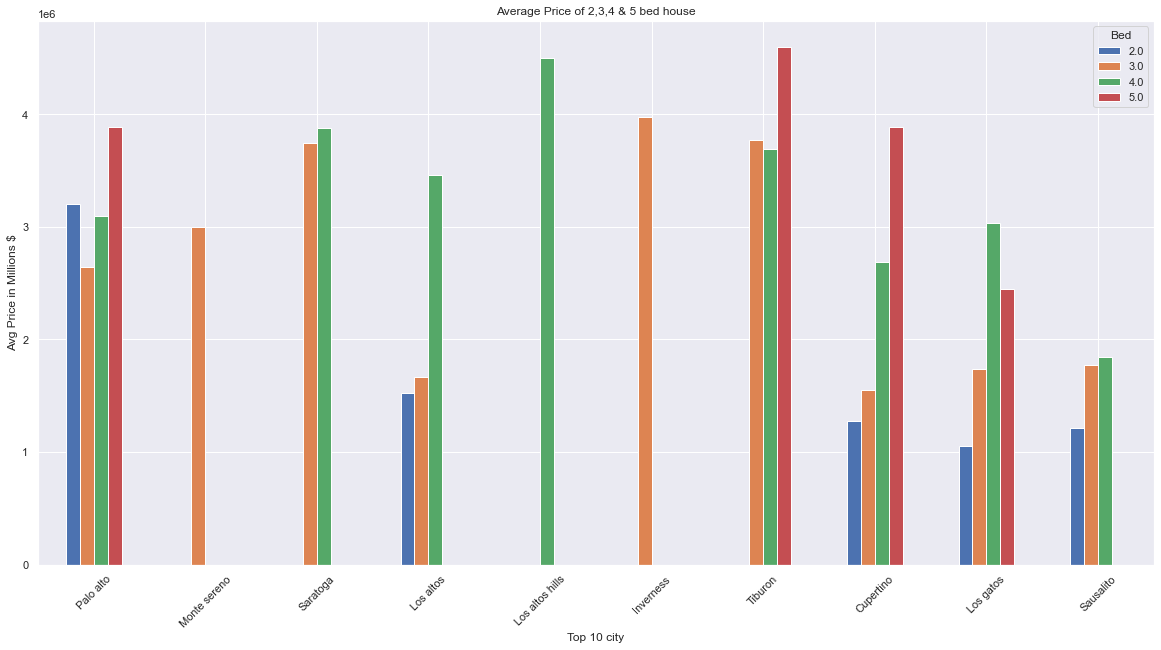

In [28]:
#Average prices of house per bed 

cross_tab.loc[['Palo alto','Monte sereno','Saratoga', 'Los altos', 'Los altos hills', 'Inverness', 'Tiburon', 'Cupertino', 'Los gatos', 'Sausalito'],[2,3,4,5]].plot.bar(figsize=(20,10))

plt.title('Average Price of 2,3,4 & 5 bed house')
plt.ylabel('Avg Price in Millions $')
plt.xlabel('Top 10 city')
plt.legend(loc = 'upper right', ncol = 1, title = "Bed")
plt.xticks(rotation = 45)

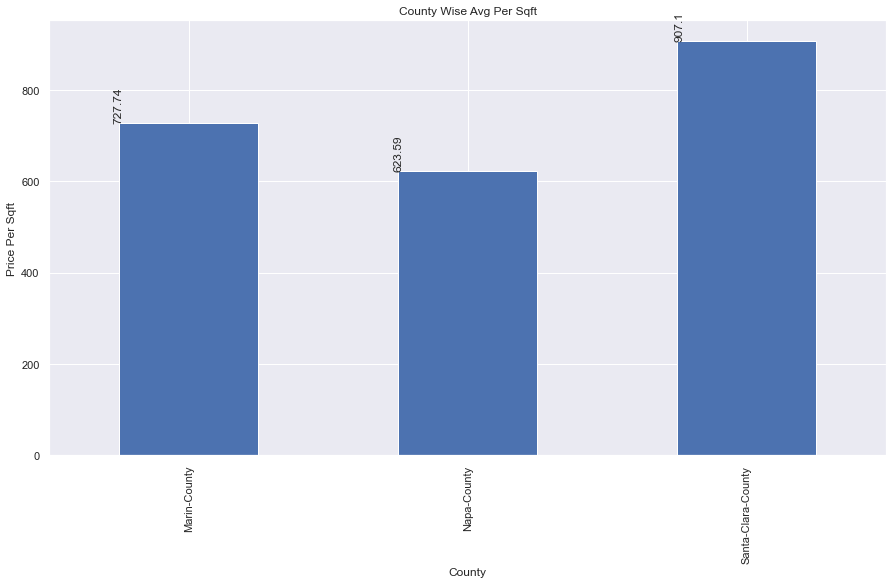

In [29]:
#Bar plot of county and average price per sqft
df_grp = data_df.groupby(['County'])['Price_per_sqft'].mean().round(2)
ax = df_grp.plot(kind='bar', figsize = (15,8))
plt.ylabel("Price Per Sqft")
plt.title('County Wise Avg Per Sqft')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), horizontalalignment='center', rotation='vertical')


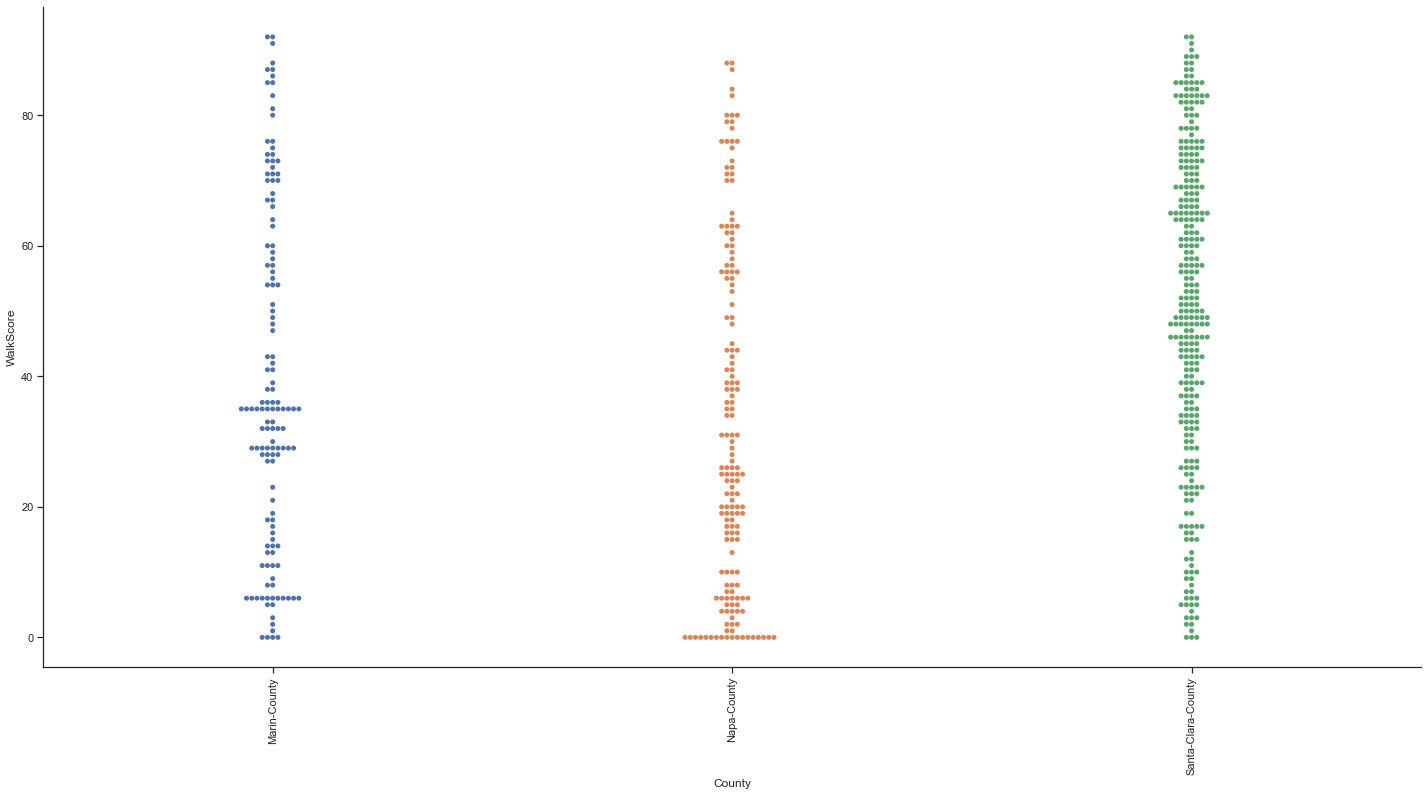

In [30]:
#Catplot of walkscore and bike score to check range of scores county wise
import matplotlib.pyplot as plot
import warnings
warnings.filterwarnings('ignore')
new_data_df = data_df.dropna(subset=['County', 'WalkScore', 'Bike_Score'])

sns.set_theme(style="ticks", color_codes=True)
g = sns.catplot(x="County", y="WalkScore", data=new_data_df, height=10, aspect=20/10, kind='swarm')
g.set_xticklabels(rotation=90)

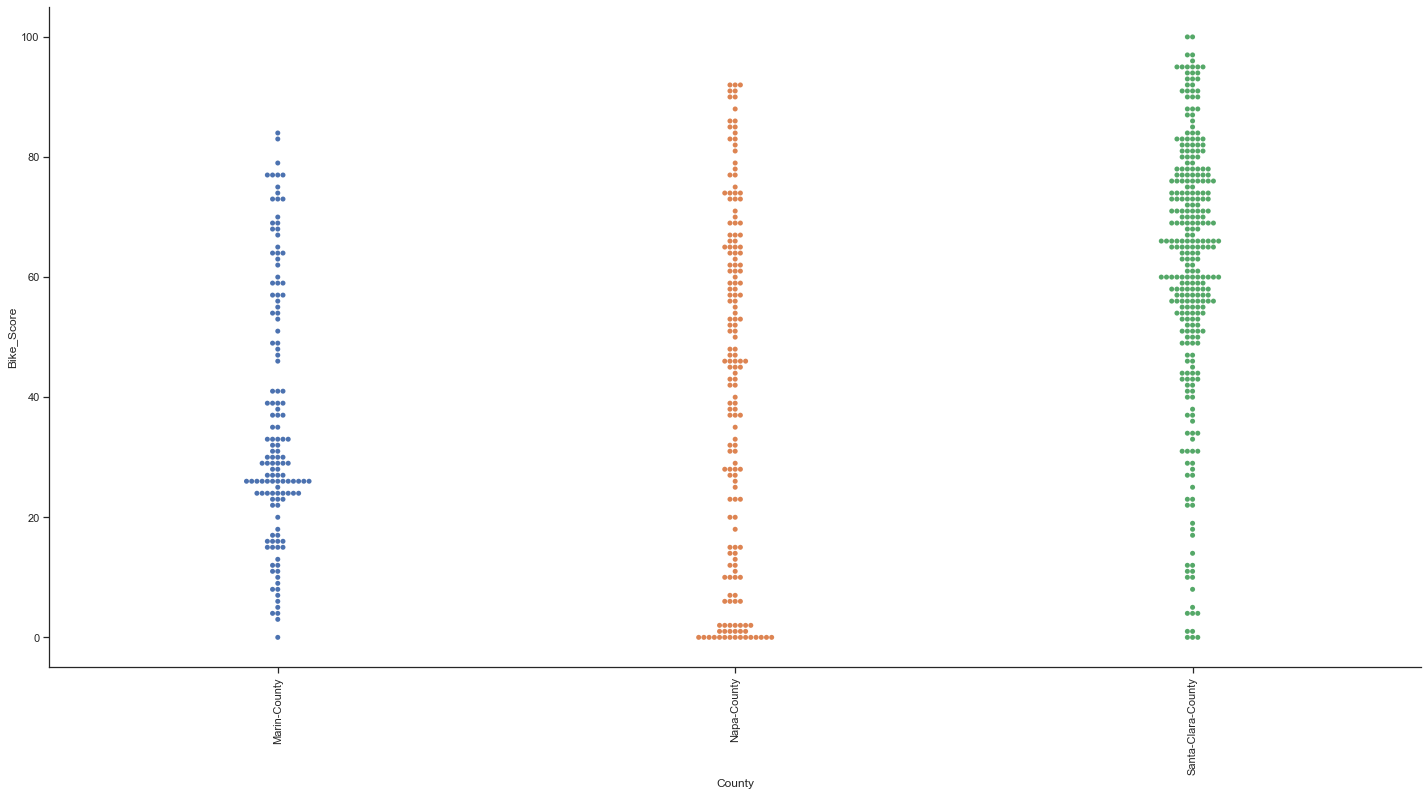

In [31]:
warnings.filterwarnings('ignore')
new_data_df = data_df.dropna(subset=['County', 'WalkScore', 'Bike_Score'])

sns.set_theme(style="ticks", color_codes=True)
g = sns.catplot(x="County", y="Bike_Score", data=new_data_df, height=10, aspect=20/10, kind='swarm')
g.set_xticklabels(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Napa-County'),
  Text(1, 0, 'Marin-County'),
  Text(2, 0, 'Santa-Clara-County')])

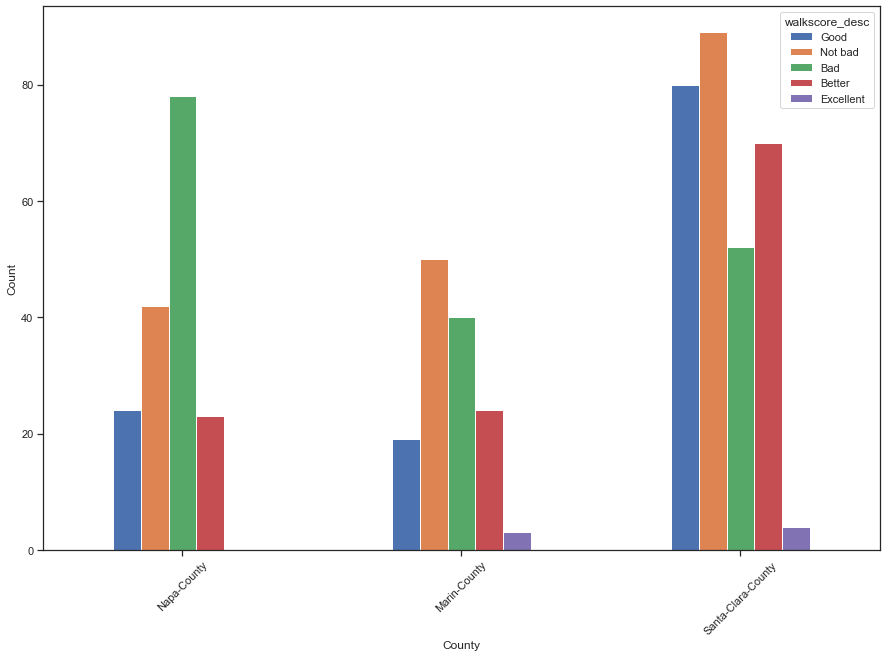

In [32]:
#Categorizing scores into ordinal categories
walkscore_list = []
for t in data_df['WalkScore']:
    if t <= 100 and t >= 90:
        walkscore_list.append('Excellent')
    elif t <= 89 and t >= 70:
        walkscore_list.append('Better')
    elif t <= 69 and t >= 50:
        walkscore_list.append('Good')
    elif t <= 49 and t >= 25:
        walkscore_list.append('Not bad')
    elif t <= 24 and t >= 0:
        walkscore_list.append('Bad')
    else:
        walkscore_list.append('')
data_df['walkscore_desc'] = walkscore_list
g = pd.crosstab(data_df['County'], data_df['walkscore_desc'])
County_3 = ['Napa-County','Marin-County','Santa-Clara-County']
unique_ts = list(data_df['walkscore_desc'].unique())
g.loc[County_3, unique_ts].plot.bar(figsize=(15,10))
plot.xlabel('County')
plot.ylabel('Count')
plot.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'Napa-County'),
  Text(1, 0, 'Marin-County'),
  Text(2, 0, 'Santa-Clara-County')])

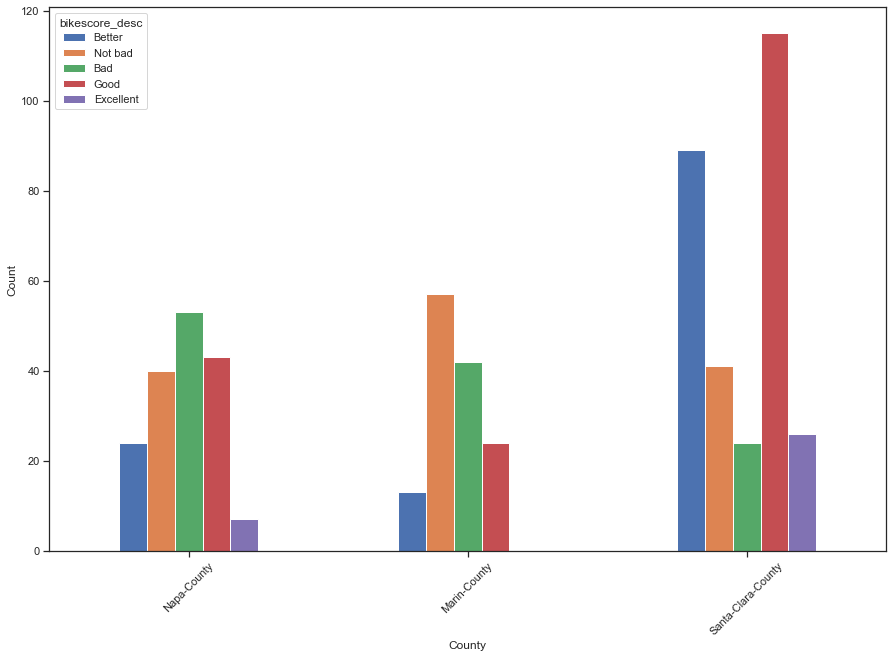

In [33]:
bikescore_list = []
for t in data_df['Bike_Score']:
    if t <= 100 and t >= 90:
        bikescore_list.append('Excellent')
    elif t <= 89 and t >= 70:
        bikescore_list.append('Better')
    elif t <= 69 and t >= 50:
        bikescore_list.append('Good')
    elif t <= 49 and t >= 25:
        bikescore_list.append('Not bad')
    elif t <= 24 and t >= 0:
        bikescore_list.append('Bad')
    else:
        bikescore_list.append('')
data_df['bikescore_desc'] = bikescore_list
g = pd.crosstab(data_df['County'], data_df['bikescore_desc'])
County_3 = ['Napa-County','Marin-County','Santa-Clara-County']
unique_ts = list(data_df['bikescore_desc'].unique())
g.loc[County_3, unique_ts].plot.bar(figsize=(15,10))
plot.xlabel('County')
plot.ylabel('Count')
plot.xticks(rotation=45)

Text(0.5, 1.0, 'Correlation b/w Price and WalkScores')

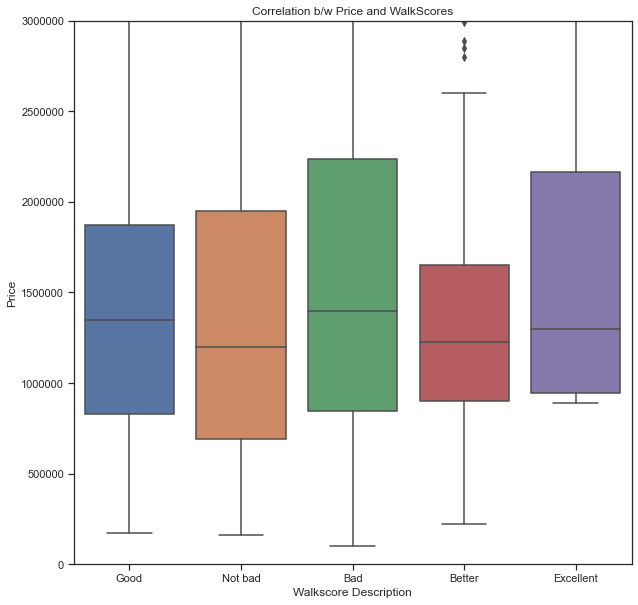

In [34]:
# Price range based on the walkscore and bikescore (averaged for each county)
plot.figure(figsize=(10,10))
sns.boxplot(x="walkscore_desc", y="Price", data=data_df)
plot.ticklabel_format(style='plain', axis='y')
plot.ylim(0, 3000000)
plot.ylabel("Price")
plot.xlabel("Walkscore Description")
plot.title("Correlation b/w Price and WalkScores")

Text(0.5, 1.0, 'Correlation b/w Price and BikeScores')

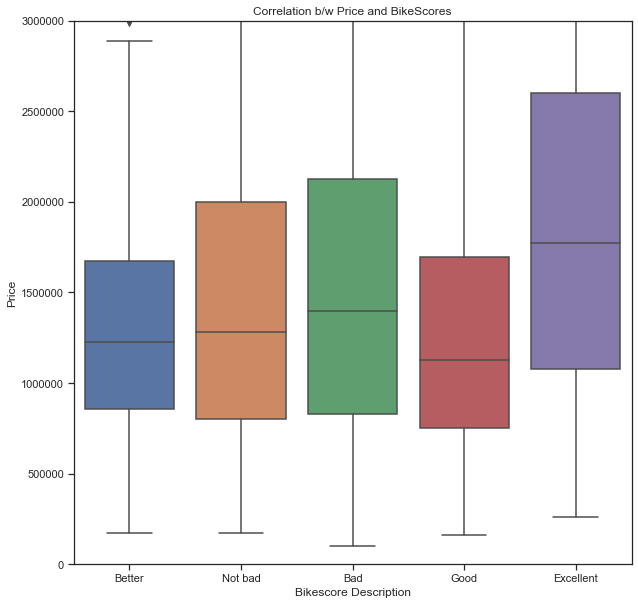

In [35]:
plot.figure(figsize=(10,10))
sns.boxplot(x="bikescore_desc", y="Price", data=data_df)
plot.ticklabel_format(style='plain', axis='y')
plot.ylim(0, 3000000)
plot.ylabel("Price")
plot.xlabel("Bikescore Description")
plot.title("Correlation b/w Price and BikeScores")

In [36]:
#Crosstab between county & status, county & property type to see how manu properties belong to different categories
#of status and property type
cross_tab = pd.crosstab(data_df['County'],data_df['Status'])
cross_tab

Status,Active,Coming soon,New
County,,,
Marin-County,136,0,0
Napa-County,165,1,1
Santa-Clara-County,289,1,5


In [37]:
cross_tab = pd.crosstab(data_df['County'],data_df['Property_Type'])
cross_tab

Property_Type,Co-op,Condo,Double-wide mobile home,Duplex,Fourplex,Manufactured on land,Mobile/manufactured home,Multi-family (2-4 unit),Single family home,Single family residence,Single family residential,Townhouse,Triplex
County,,,,,,,,,,,,,
Marin-County,1,38,0,0,1,0,3,2,0,1,72,18,0
Napa-County,0,10,0,0,0,1,22,4,4,2,117,7,0
Santa-Clara-County,0,42,22,10,0,0,0,1,174,1,13,30,2


In [ ]:
#Categorizing property types into generic categories

In [39]:
Property_Type_Category =[]
for i in data_df['Property_Type']:
    if i in ['Single family', 'Single family home', 'Single family residence',
                'Single family residential','Single-wide mobile home']:
        Property_Type_Category.append('Single')
        
    elif i in ['Residential, single family', 'Residential, townhouse', 'Townhouse']:
        Property_Type_Category.append('Residential')
        
    elif i in ['Cabin', 'Co-op', 'Condo', 'Condo/co-op']:
        Property_Type_Category.append('Condo')
        
    else :
        Property_Type_Category.append('Others')

In [40]:
data_df['Property_Type_Category'] =Property_Type_Category
data_df

,State,County,Street,City,Zipcode,Price,WalkScore,Bike_Score,Beds,Bath,Sqft,Property_Type,Year_Built,Status,Price_per_sqft,walkscore_desc,bikescore_desc,Property_Type_Category
0,Ca,Marin-County,6 issaquah dock,Sausalito,94965,1495000.0,67,83.0,2.0,2.0,1228.0,Mobile/manufactured home,1987.0,Active,1217.43,Good,Better,Others
1,Ca,Marin-County,712 tamarack dr s,San rafael,94903,1699000.0,38,27.0,5.0,3.0,2306.0,Single family residential,1963.0,Active,736.77,Not bad,Not bad,Single
2,Ca,Marin-County,41 bonnie banks way,San rafael,94901,1995000.0,29,29.0,4.0,3.0,3500.0,Single family residential,1970.0,Active,570.00,Not bad,Not bad,Single
3,Ca,Marin-County,510 midway blvd,Novato,94947,885000.0,21,16.0,3.0,2.0,1212.0,Single family residential,1955.0,Active,730.20,Bad,Bad,Single
4,Ca,Marin-County,848 diablo ave #3,Novato,94947,618000.0,88,69.0,2.0,2.5,1270.0,Condo,2000.0,Active,486.61,Better,Good,Condo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,Ca,Santa-Clara-County,926 northrup st,San jose,95126,1249000.0,82,75.0,2.0,2.0,1934.0,Duplex,1957.0,Active,645.81,Better,Better,Others
594,Ca,Santa-Clara-County,4895 pearl ave,San jose,95136,1880000.0,74,74.0,2.0,1.0,1322.0,Single family home,1917.0,Active,1422.09,Better,Better,Single
595,Ca,Santa-Clara-County,15600 peach hill rd,Saratoga,95070,3749000.0,0,0.0,3.0,2.0,2607.0,Single family home,1960.0,Active,1438.05,Bad,Bad,Single
596,Ca,Santa-Clara-County,110 cochrane rd,Morgan hill,95037,920000.0,45,73.0,3.0,3.0,1773.0,Townhouse,2014.0,Active,518.89,Not bad,Better,Residential


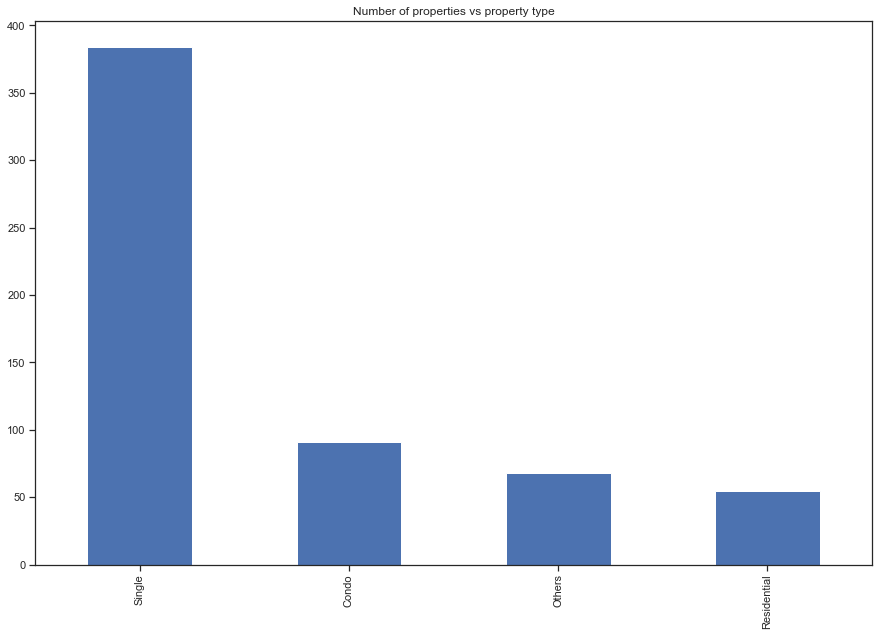

In [41]:
#Bar plot of Proeprty type category vs Number of properties
ax = data_df['Property_Type_Category'].value_counts().plot(kind='bar',figsize=(15,10),
                                                      title='Number of properties vs property type')

In [ ]:
#Prediction Analysis

<AxesSubplot:>

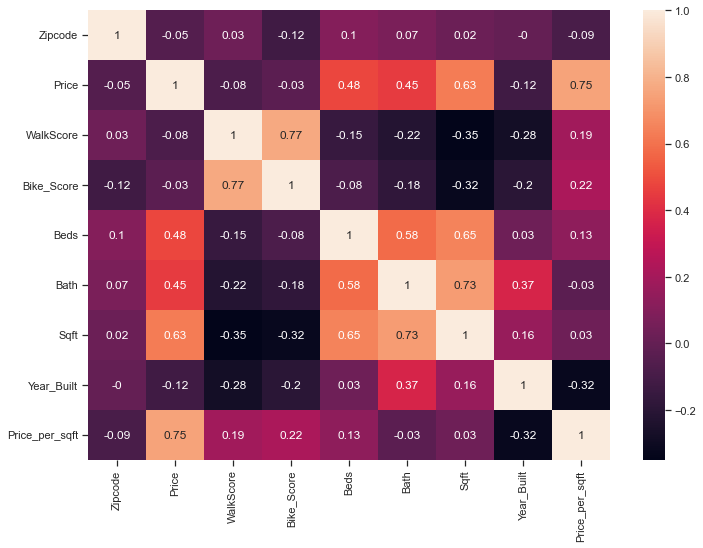

In [42]:
#Plotting correlation matrix to see how Price is correlated with other variables
correlation_matrix = data_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
# It shows price is correlated to Sqft followed by Bath and Bed.
# It also shows that years built has almost no correlation with price which means land maintains its 
#value over the years and additional significant modification done on the property would not result in significant gain.

In [ ]:
#X - columns that will be used for prediction
#Y - target variable that will be predicted

In [43]:
#Including attributes with positive correlation as independent variables
X=data_df[['WalkScore','Bike_Score','Beds','Bath','Sqft']]

In [44]:
Y=data_df['Price'].values

In [45]:
#splitting data into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8)

In [46]:
#fitting and transforming model
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.fit_transform(X_test.astype(np.float))

In [47]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [48]:
#intercept and slope
print(regressor.intercept_)
print(regressor.coef_)

1431704.3577405857
[ 62292.67836425  83814.85490684  96891.34248385 -60308.16031047
 590611.53848817]


In [49]:
#predicting the test data
Y_pred = regressor.predict(X_test)

<AxesSubplot:ylabel='Density'>

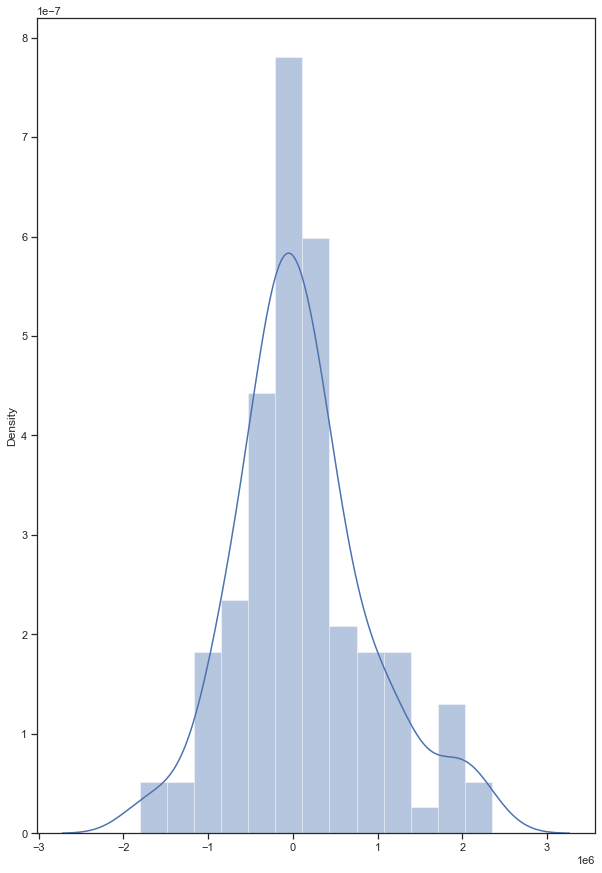

In [50]:
#plotting residuals graph 
fig = plt.figure(figsize=(10,15))
residuals = (Y_test - Y_pred)
sns.distplot(residuals)

In [51]:
#actual vs predicted and errors
df_pred = pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
print(df_pred.head())
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test,Y_pred)) 
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test,Y_pred)) 
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_absolute_error(Y_test,Y_pred)))
print('Variance Score: ', metrics.explained_variance_score(Y_test,Y_pred))

      Actual     Predicted
0  1100000.0  8.759421e+05
1   885900.0  2.260503e+06
2   975000.0  1.138781e+06
3   469000.0  1.222310e+06
4  1880000.0  1.096932e+06
Mean Absolute Error:  586095.2092847757
Mean Squared Error:  634651895338.3813
Root Mean Squared Error:  765.5685529622907
Variance Score:  0.37346700614940587


                    Coeff
Beds         60457.370562
Bike_Score    3508.013841
WalkScore     3419.883917
Sqft           969.851640
Bath       -106317.421001


R^2 is:  0.42842475955262926


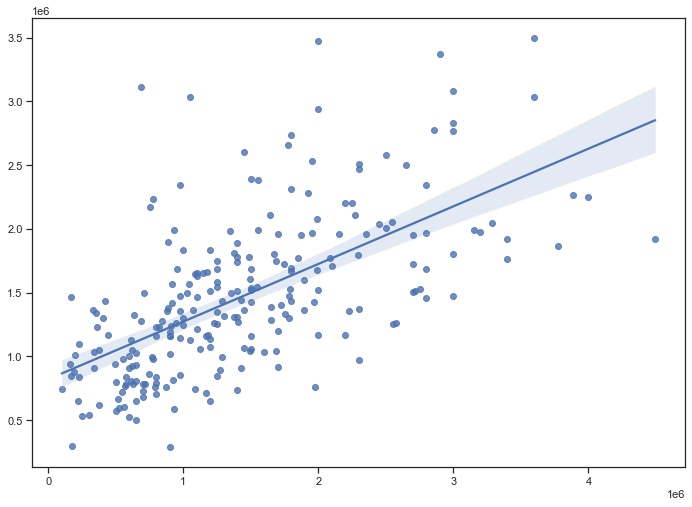

In [52]:
lm=LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40, random_state=101)

lm.fit(X_train,Y_train) #fitting the model

predictions=lm.predict(X_test) #calculating predictions based on the model creaated in previous line

sns.regplot(Y_test,predictions,fit_reg=True) #plotting the model

cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff']) #Creating a datframe of coefficients obtained from the model
print(cdf.sort_values(by='Coeff',ascending=False))

print("\n")

print("R^2 is: ",lm.score(X,Y))